Test datasets are small contrived datasets that let you test a machine learning algorithm or test harness.

The data from test datasets have well-defined properties, such as linearly or non-linearity, that allow you to explore specific algorithm behavior.

The __scikit-learn__ Python library provides a suite of functions for generating samples from configurable test problems for regression and classification.

Below are some desirable properties of test datasets:

- They can be generated quickly and easily.
- They contain “known” or “understood” outcomes for comparison with predictions.
- They are stochastic, allowing random variations on the same problem each time they are generated.
- They are small and easily visualized in two dimensions.
- They can be scaled up trivially.

In [2]:
import numpy as np

- Generate a uniform random sample from np.arange(5) of size n:


In [3]:
print(np.random.choice(5, 3))
print(np.random.choice(5, 2))
print(np.random.choice(5, 4))
print(np.random.choice(5, 5))
print(np.random.choice(5, 7))
print(np.random.choice(5, 11))

[3 4 1]
[2 0]
[1 2 4 0]
[3 0 3 1 2]
[2 2 0 0 0 0 4]
[2 3 0 2 1 3 3 4 1 4 3]


- Generate a non-uniform random sample from np.arange(5) of size n:

In [4]:
print(np.random.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0]))
print(np.random.choice(5, 3, p=[1  , 0, 0,   0,   0]))
print(np.random.choice(5, 3, p=[1  , 0, 0,   0,   0]))
print(np.random.choice(5, 3, p=[0 , 0, 1,   0,   0]))


[0 0 2]
[0 0 0]
[0 0 0]
[2 2 2]


In [5]:
print(np.random.choice(['A', 'B',  'C', 'D', 'E'], 
                       3, 
                       p=[0 , .5, .5,   0,   0]))

['B' 'B' 'C']


In [6]:
print(np.random.choice(['A', 'B',  'C', 'D', 'E'], 
                       (3, 2) ,
                       p=[0 , .5, .5,   0,   0]))

[['C' 'B']
 ['C' 'B']
 ['B' 'C']]


In [7]:
# Generate a uniform random sample from np.arange(5) of size 3 
# without replacement:
np.random.choice(5, 3, replace=False)

array([2, 4, 3])

In [8]:
# Generate a non-uniform random sample from np.arange(5) of size 3 without replacement:
np.random.choice(5, 3, replace=False, p=[0.1, 0, 0.3, 0.6, 0])

array([0, 2, 3])

In [9]:
arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
np.random.choice(arr, 4, p=[0.5, 0.1, 0.1, 0.3], replace=False)

array(['pooh', 'rabbit', 'Christopher', 'piglet'], dtype='<U11')

In [10]:
np.random.choice(arr, 14, p=[0.5, 0.1, 0.1, 0.3], replace=True)

array(['pooh', 'rabbit', 'piglet', 'rabbit', 'pooh', 'Christopher',
       'pooh', 'Christopher', 'pooh', 'piglet', 'pooh', 'rabbit',
       'piglet', 'pooh'], dtype='<U11')

#### Classification Test Problems

3 classification problems: 
- blobs, 
- moons and 
- circles.

> Blobs Classification Problem

- The make_blobs() function can be used to generate blobs of points with a Gaussian distribution.

- You can control how many blobs to generate and the number of samples to generate, PLUS host of other properties.

- The problem is suitable for __linear classification__ problems given the linearly separable nature of the blobs.


__Parameters__:	
__n_samples__ : int, optional (default=100) - The number of samples.

__n_features__ : int, optional (default=20) - The total number of features. These comprise 
- n_informative informative features, 
- n_redundant redundant features, 
- n_repeated duplicated features and 
- (n_features-n_informative-n_redundant-n_repeated) useless features drawn at random.

__n_informative__ : int, optional (default=2)
The number of informative features. Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. For each cluster, informative features are drawn independently from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance. The clusters are then placed on the vertices of the hypercube.

__n_redundant__ : int, optional (default=2)
The number of redundant features. These features are generated as random __linear combinations__ of the informative features.

n_repeated : int, optional (default=0)
The number of __duplicated features__, drawn randomly from the informative and the redundant features.

n_classes : int, optional (default=2)
The number of classes (or labels) of the classification problem.

n_clusters_per_class : int, optional (default=2)
The number of clusters per class.

__weights__ : list of floats or None (default=None)
The proportions of samples assigned to each class. If None, then classes are balanced. Note that if len(weights) == n_classes - 1, then the last class weight is automatically inferred. More than n_samples samples may be returned if the sum of weights exceeds 1.

flip_y : float, optional (default=0.01)
The fraction of samples whose class are randomly exchanged. Larger values introduce noise in the labels and make the classification task harder.

class_sep : float, optional (default=1.0)
The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.

hypercube : boolean, optional (default=True)
If True, the clusters are put on the vertices of a hypercube. If False, the clusters are put on the vertices of a random polytope.

shift : float, array of shape [n_features] or None, optional (default=0.0)
Shift features by the specified value. If None, then features are shifted by a random value drawn in [-class_sep, class_sep].

scale : float, array of shape [n_features] or None, optional (default=1.0)
Multiply features by the specified value. If None, then features are scaled by a random value drawn in [1, 100]. Note that scaling happens after shifting.

shuffle : boolean, optional (default=True)
Shuffle the samples and the features.

random_state : int, RandomState instance or None (default)
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.

Returns:	
X : array of shape [n_samples, n_features]
The generated samples.

y : array of shape [n_samples]
The integer labels for class membership of each sample.



- __Example 1__

In [53]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_classification
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

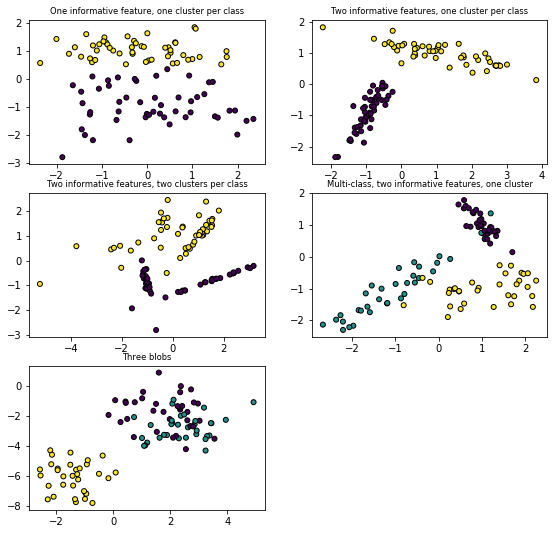

In [59]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, 
                             n_redundant=0, 
                             n_informative=1,
                             n_clusters_per_class=1)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, 
                             n_redundant=0, 
                             n_informative=2,
                             n_clusters_per_class=1)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(323)
plt.title("Two informative features, two clusters per class",
          fontsize='small')

X2, Y2 = make_classification(n_features=2, 
                             n_redundant=0, 
                             n_informative=2)

plt.scatter(X2[:, 0], 
            X2[:, 1], 
            marker='o', 
            c=Y2,
            s=25, 
            edgecolor='k')

plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small')
X1, Y1 = make_classification(n_features=2, 
                             n_redundant=0, 
                             n_informative=2,
                             n_clusters_per_class=1, 
                             n_classes=3)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(325)

plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')


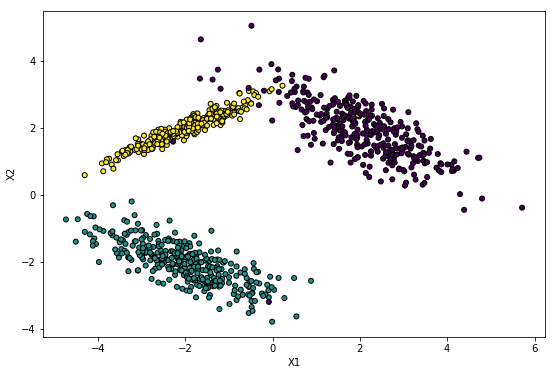

In [111]:
# trials ... 
# (informative + redundant + repeated features) <  the number of total features
# (n_classes * n_clusters_per_class) <= 2 ** n_informative

X, y = make_classification(  n_samples           = 1000,
                             n_features          = 2, 
                             n_redundant         = 0, 
                             n_informative       = 2,
                             n_classes           = 3,
                             n_clusters_per_class= 1,
                             class_sep           = 2,
                             weights             = [.33, .33, .33])
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], 
            X[:, 1], 
            marker='o', 
            c=y,
            s=25, 
            edgecolor='k')

plt.xlabel('X1')
plt.ylabel('X2');


- __Example__ - 2

- The example below generates a 2D dataset of samples with 3 blobs as a multi-class classification prediction problem. Each observation has two features and 0, 1, or 2 class values.

In [48]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

In [49]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, 
                  centers=3, 
                  n_features=2)


In [50]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))


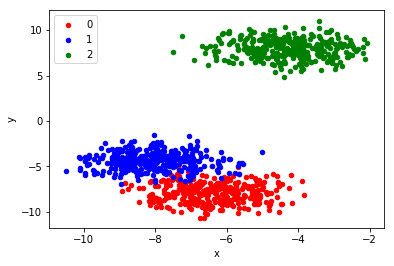

In [56]:
colors = {0:'red', 1:'blue', 2:'green'}
plt.figure(figsize=(8, 8))
fig, ax = pyplot.subplots()

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, 
               kind='scatter', 
               x='x', 
               y='y', 
               label=key, 
               color=colors[key]);

> Make blobs (for clusterining)

In [112]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [166]:
# create blobs
data = make_blobs(n_samples=1000, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=1.25, 
                  random_state=50)

In [167]:
# create np array for data points
points = data[0]

(-15, 15)

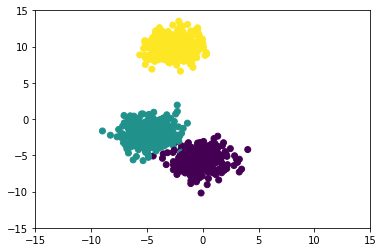

In [168]:
# create scatter plot
plt.scatter(data[0][:,0], 
            data[0][:,1], 
            c=data[1], 
            cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

> Moons Classification Problem

The make_moons() function is for binary classification and will generate a swirl pattern, or two moons.

You can control how noisy the moon shapes are and the number of samples to generate.

This test problem is suitable for algorithms that are capable of learning __nonlinear__ class boundaries.

The example below generates a moon dataset with moderate noise.

In [40]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame

In [41]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.1)

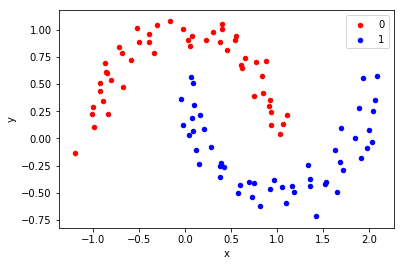

In [42]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

> Circles Classification Problem

The make_circles() function generates a binary classification problem with datasets that fall into concentric circles.

Again, as with the moons test problem, you can control the amount of noise in the shapes.

This test problem is suitable for algorithms that can learn complex non-linear manifolds.

The example below generates a circles dataset with some noise.

In [44]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame


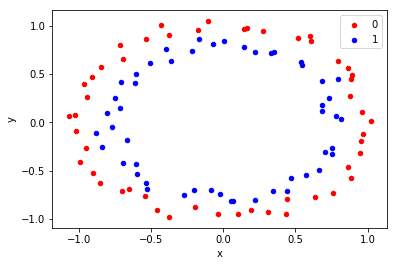

In [45]:
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])